In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data

In [3]:
email_sent = pd.read_csv("email_dataset/email_table.csv")
email_sent.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases'],
      dtype='object')

In [4]:
email_opened = pd.read_csv("email_dataset/email_opened_table.csv")
email_opened.columns

Index(['email_id'], dtype='object')

In [5]:
link_clicked = pd.read_csv("email_dataset/link_clicked_table.csv")
link_clicked.columns

Index(['email_id'], dtype='object')

In [6]:
print(email_sent.shape)
print(email_opened.shape)
print(pd.merge(email_sent,email_opened, on=['email_id']).shape)

(100000, 7)
(10345, 1)
(10345, 7)


In [7]:
email_opened[~(email_opened.email_id.isin(email_sent.email_id))]

,email_id


In [8]:
link_clicked[~(link_clicked.email_id.isin(email_sent.email_id))]

,email_id


In [9]:
link_clicked[~(link_clicked.email_id.isin(email_opened.email_id))].shape

(50, 1)

50 Email ids are present in Link clicked dataframe but are not there in email opened dataframe. Data Error!

### Merge dataframe

In [10]:
email_sent['is_opened'] = np.where(email_sent['email_id'].isin(email_opened['email_id']),1,0)

In [11]:
email_sent.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'is_opened'],
      dtype='object')

In [12]:
email_sent['is_link_clicked'] = np.where(email_sent['email_id'].isin(link_clicked['email_id']),1,0)
email_sent.columns

Index(['email_id', 'email_text', 'email_version', 'hour', 'weekday',
       'user_country', 'user_past_purchases', 'is_opened', 'is_link_clicked'],
      dtype='object')

In [13]:
email_sent.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,is_opened,is_link_clicked
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


In [14]:
email_sent.groupby('is_opened').agg({'is_link_clicked':'sum'})

,is_link_clicked
is_opened,
0,50
1,2069


Email link is clicked after opening email! is_link_clicked cannot be 1 if is_opened is 0 ! 

In [15]:
email_sent.loc[email_sent['is_opened']==0, 'is_link_clicked'] = 0

In [16]:
email_sent.groupby('is_opened').agg({'is_link_clicked':'sum'})

,is_link_clicked
is_opened,
0,0
1,2069


### Analysis

In [17]:
email_sent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
is_opened              100000 non-null int32
is_link_clicked        100000 non-null int32
dtypes: int32(2), int64(3), object(4)
memory usage: 6.1+ MB


No missing values. 

In [18]:
email_sent['email_id'].nunique()

100000

Email_id column has unique values. Can be removed.

In [19]:
email_sent.describe(include='all')

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,is_opened,is_link_clicked
count,100000.000000,100000,100000,100000.000000,100000,100000,100000.00000,100000.000000,100000.000000
unique,NaN,2,2,NaN,7,4,NaN,NaN,NaN
top,NaN,long_email,generic,NaN,Saturday,US,NaN,NaN,NaN
freq,NaN,50276,50209,NaN,14569,60099,NaN,NaN,NaN
mean,498690.196160,NaN,NaN,9.059300,NaN,NaN,3.87845,0.103450,0.020690
std,289230.727534,NaN,NaN,4.439637,NaN,NaN,3.19611,0.304547,0.142345
min,8.000000,NaN,NaN,1.000000,NaN,NaN,0.00000,0.000000,0.000000
25%,246708.250000,NaN,NaN,6.000000,NaN,NaN,1.00000,0.000000,0.000000
50%,498447.000000,NaN,NaN,9.000000,NaN,NaN,3.00000,0.000000,0.000000
75%,749942.750000,NaN,NaN,12.000000,NaN,NaN,6.00000,0.000000,0.000000


In [20]:
email_sent['email_text'].unique()

array(['short_email', 'long_email'], dtype=object)

In [21]:
email_sent['email_version'].unique()

array(['personalized', 'generic'], dtype=object)

In [22]:
email_sent['hour'].unique()

array([ 2, 12, 11,  6, 14,  9,  8,  5, 23,  7, 10,  3,  4,  1, 13, 15, 17,
       16, 20, 18, 19, 22, 21, 24], dtype=int64)

In [23]:
email_sent['weekday'].unique()

array(['Sunday', 'Wednesday', 'Monday', 'Saturday', 'Friday', 'Tuesday',
       'Thursday'], dtype=object)

In [24]:
email_sent['user_country'].unique()

array(['US', 'UK', 'FR', 'ES'], dtype=object)

In [25]:
email_sent['user_past_purchases'].unique()

array([ 5,  2,  1,  6,  3,  8,  4,  9,  0, 11, 10,  7, 13, 12, 18, 14, 20,
       15, 16, 17, 19, 22, 21], dtype=int64)

In [26]:
email_sent.describe(include=['O'])

,email_text,email_version,weekday,user_country
count,100000,100000,100000,100000
unique,2,2,7,4
top,long_email,generic,Saturday,US
freq,50276,50209,14569,60099


In [27]:
email_sent.groupby('email_version').agg({'is_link_clicked':'sum'})

,is_link_clicked
email_version,
generic,729
personalized,1340


In [28]:
email_sent.groupby('email_text').agg({'is_link_clicked':'sum'})

,is_link_clicked
email_text,
long_email,904
short_email,1165


In [29]:
email_sent.groupby('weekday').agg({'email_id':'count'})

,email_id
weekday,
Friday,14177
Monday,14363
Saturday,14569
Sunday,14387
Thursday,14277
Tuesday,14143
Wednesday,14084


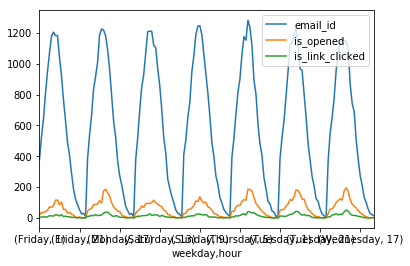

In [30]:
data_grouped_by_hw = email_sent.groupby(['weekday','hour']).agg({'email_id':'count','is_opened':'sum','is_link_clicked':'sum'})
data_grouped_by_hw.plot()

In [31]:
email_sent.groupby('weekday').agg({'is_opened':'sum','is_link_clicked':'sum'}).sort_values('is_opened',ascending=0)

,is_opened,is_link_clicked
weekday,,
Tuesday,1704,346
Wednesday,1694,383
Thursday,1691,346
Monday,1667,324
Saturday,1277,255
Sunday,1261,228
Friday,1051,187


In [32]:
data = email_sent.loc[:,email_sent.columns!='email_id']

## Visualization

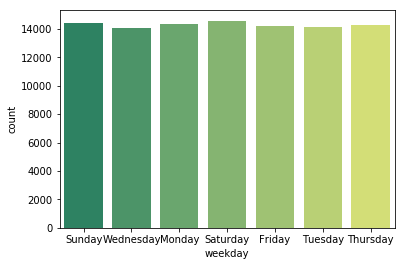

In [33]:
sns.countplot(data=data, x='weekday', palette='summer')

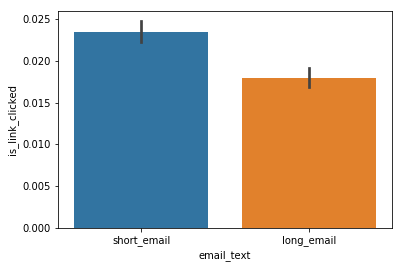

In [34]:
sns.barplot(x=data['email_text'], y=data['is_link_clicked'])

Links in short emails were clicked more often than long emails

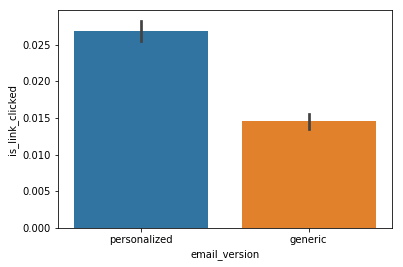

In [35]:
sns.barplot(x=data['email_version'],y=data['is_link_clicked'])

Personalized email links were clicked more than generic emails.

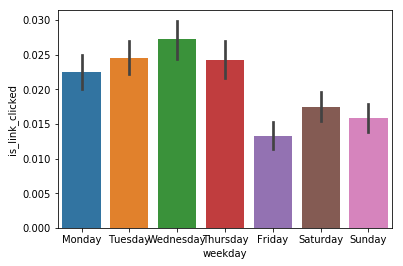

In [36]:
sns.barplot(x=data['weekday'],y=data['is_link_clicked'],data=data,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

Clinks were clicked more often on weekdays (Monday through Thursday) than weekends(Friday through Sunday)

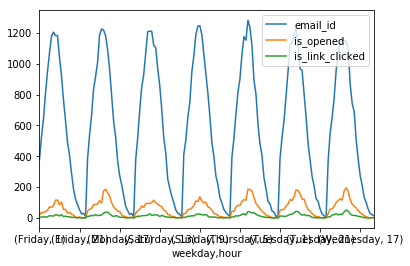

In [37]:
data_grouped_by_hw.plot()

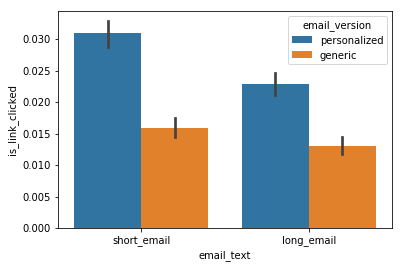

In [38]:
sns.barplot(x=data['email_text'],y=data['is_link_clicked'],hue=data['email_version'])

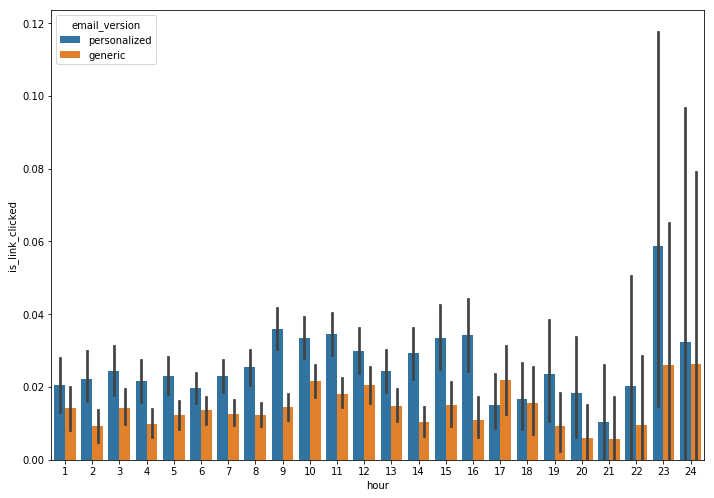

In [39]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
sns.barplot(x='hour',y='is_link_clicked',data=data,hue='email_version')

### Initial model

Email_id column has unique values. It is irrelevant to the model. Can be eliminated.

In [40]:
data = email_sent.loc[:,email_sent.columns != 'email_id']
data.columns

Index(['email_text', 'email_version', 'hour', 'weekday', 'user_country',
       'user_past_purchases', 'is_opened', 'is_link_clicked'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
data_dummies = pd.get_dummies(data=data,columns=['email_text','email_version','weekday','user_country'])
features = data_dummies.loc[:,data_dummies.columns != 'is_link_clicked']
target = data_dummies['is_link_clicked']
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.3,random_state=0,stratify=target)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(70000, 18) (30000, 18) (70000,) (30000,)


In [43]:
data_dummies.groupby('is_link_clicked').agg({'is_link_clicked':'count'})

,is_link_clicked
is_link_clicked,
0,97931
1,2069


In [44]:
y_test.sum()

621

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report

In [46]:
#Create and fit model
logreg = LogisticRegression(class_weight='balanced').fit(x_train,y_train)

#Predict 
predicted = logreg.predict(x_test)

#Confusion matrix
confusion = confusion_matrix(y_test, predicted)
print("Confusion Matrix: \n{}".format(confusion))



Confusion Matrix: 
[[26799  2580]
 [    0   621]]


In [47]:
#Roc_Auc_Score
roc_auc_score(y_test,logreg.predict_proba(x_test)[:,1])

0.9696647330827024

In [48]:
#Classification report
print(classification_report(y_true=y_test,y_pred=predicted,target_names=['nonconverted','converted']))

              precision    recall  f1-score   support

nonconverted       1.00      0.91      0.95     29379
   converted       0.19      1.00      0.32       621

 avg / total       0.98      0.91      0.94     30000



In [49]:
logreg.get_params()

{'C': 1.0,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [50]:
print(y_train.sum())
train_preds = logreg.predict(x_train)
train_preds.sum()

1448


7144

The benchmark model has very low precision rate (0.19)

### Feature Selection

##### sklearn.feature_selection.RFE

In [51]:
from sklearn.feature_selection import RFECV

In [52]:
model = LogisticRegression()
rfe = RFECV(model)
fit = rfe.fit(features,target)

In [53]:
print("All feature : ",features.columns)
print("Selected features : ",fit.support_)
print("Feature ranking : ",fit.ranking_)
print("Number of features : ",fit.n_features_)

All feature :  Index(['hour', 'user_past_purchases', 'is_opened', 'email_text_long_email',
       'email_text_short_email', 'email_version_generic',
       'email_version_personalized', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'user_country_ES',
       'user_country_FR', 'user_country_UK', 'user_country_US'],
      dtype='object')
Selected features :  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
Feature ranking :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Number of features :  18


In [54]:
selected_data = data_dummies[['hour', 'user_past_purchases', 'is_opened', 'email_text_long_email',
       'email_text_short_email', 'email_version_generic',
       'email_version_personalized', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'user_country_ES',
       'user_country_FR', 'user_country_UK', 'user_country_US','is_link_clicked']]
selected_features = selected_data.loc[:,selected_data.columns != 'is_link_clicked']
target = selected_data['is_link_clicked']

In [55]:
# Splitting selected features
x_train,x_test,y_train,y_test = train_test_split(selected_features,target,test_size=0.3,random_state=0,stratify=target)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
y_test.sum()

(70000, 18) (30000, 18) (70000,) (30000,)


621

In [56]:
print(y_train.count())
y_train.sum()

70000


1448

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_recall_fscore_support

C_param_range = [0.001,0.01,0.1,1,10,100]

metrics_table = pd.DataFrame(columns = ['C_parameter','Accuracy','Precision','Recall','F-score'])
metrics_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(C = i)
    lr.fit(x_train,y_train)
    
    # Predict using model
    y_pred = lr.predict(x_test)
    
    # Saving accuracy score in table
    metrics_table.iloc[j,1] = accuracy_score(y_test,y_pred)
    prfs = precision_recall_fscore_support(y_pred=y_pred,y_true=y_test)
    metrics_table.iloc[j,2] = prfs[0][1]
    metrics_table.iloc[j,3] = prfs[1][1]
    metrics_table.iloc[j,4] = prfs[2][1]
    
    j += 1
    
metrics_table.head(10)

C:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,C_parameter,Accuracy,Precision,Recall,F-score
0,0.001,0.9793,0,0,0
1,0.010,0.9793,0,0,0
2,0.100,0.979033,0.346154,0.0144928,0.0278207
3,1.000,0.979333,0.511111,0.037037,0.0690691
4,10.000,0.9794,0.531915,0.0402576,0.0748503
5,100.000,0.979367,0.520833,0.0402576,0.0747384


When class weight is changed to 'balanced' precision and recall were same as the initial model for all C values.

### Tuned model 

In [63]:
lrmodel = LogisticRegression(C=10).fit(x_train,y_train)
y_predicted = lrmodel.predict(x_test)

#Confusion matrix
confusion = confusion_matrix(y_test,y_pred=y_predicted)
print("Confusion matrix : \n {}".format(confusion))

Confusion matrix : 
 [[29357    22]
 [  596    25]]


In [64]:
# Model Coefficients 
lrmodel.coef_

array([[ -4.63113658e-03,   1.68231723e-01,   9.20514467e+00,
         -2.43434547e+00,  -2.37321618e+00,  -2.50445305e+00,
         -2.30310859e+00,  -8.13731211e-01,  -6.23422758e-01,
         -7.26339486e-01,  -7.92035535e-01,  -6.36715629e-01,
         -6.71035276e-01,  -5.44281751e-01,  -1.18471658e+00,
         -1.33654277e+00,  -1.14223052e+00,  -1.14407178e+00]])

In [65]:
# Model
lrmodel

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
roc_auc_score(y_test,lrmodel.predict_proba(x_test)[:,1])

0.96972047634011149

# Questions & Answers

#### What percent of users opened email and what percentage clicked on the link?

In [67]:
(data['is_opened'].sum() / data['is_opened'].count()) * 100

10.345000000000001

In [68]:
(data['is_link_clicked'].sum() / data['is_link_clicked'].count()) * 100

2.069

In [69]:
(data['is_link_clicked'].sum() / data['is_opened'].sum()) * 100

20.0

##### 10.34 % people opened the email and 2.06% 0f the people clicked on the link within email. 20% of the people who opened email, clicked on the link within.

*********************************************************************************************************

#### Maximize the probability of user clicked the link

In [70]:
#Find the pattern among people who opened email
data.groupby(['is_opened','is_link_clicked']).agg({'email_version':'max','user_past_purchases':'mean','email_text':'max','user_country':'max','hour':'mean','weekday':'max'})

email_version  user_past_purchases   email_text  \
is_opened is_link_clicked                                                   
0         0                personalized             3.785154  short_email   
1         0                personalized             4.301353  short_email   
          1                personalized             6.229580  short_email   

                          user_country      hour    weekday  
is_opened is_link_clicked                                    
0         0                         US  9.020133  Wednesday  
1         0                         US  9.400677  Wednesday  
          1                         US  9.391010  Wednesday

##### The probability of the user clicking the link is more when
    *  email_version is personalized
    *  email_text is short
    *  user past purchase is 6.22(avg) or more
    *  email sent on 'Wednesday'
    *  email sent at 9 to 10 hour

**************************************************************************************************************

#### How much do you think your model would improve click through rate.

##### This model has  precision rate of 0.53. Which means if the model predicted that the link will be clicked then the probability of it being true  would be 0.53. The click through rate for the random select approach is 0.0206. 

**************************************************************************************************************

#### Patterns on how the email campaign peformed for different segments of user

In [86]:
geographical = data.groupby('user_country').agg({'is_link_clicked':'sum','email_text':'count'})
geographical['click_through_rate_%'] = (geographical['is_link_clicked'] / geographical['email_text']) * 100
geographical

,is_link_clicked,email_text,click_through_rate_%
user_country,,,
ES,80,9967,0.802649
FR,74,9995,0.740370
UK,481,19939,2.412358
US,1434,60099,2.386063


###### Click through rate is highest in UK region and closely followed by US region

In [88]:
purchase_wise = data.groupby('user_past_purchases').agg({'is_link_clicked':'sum','email_text':'count'})
purchase_wise['click_through_rate_%'] = (purchase_wise['is_link_clicked'] / purchase_wise['email_text']) * 100
purchase_wise

,is_link_clicked,email_text,click_through_rate_%
user_past_purchases,,,
0,2,13877,0.014412
1,147,13751,1.069013
2,192,13036,1.472844
3,193,12077,1.598079
4,223,10743,2.075770
5,198,9042,2.189781
6,237,7518,3.152434
7,179,6051,2.958189
8,174,4393,3.960847


People who made more purchases in the past are more likely to click the link. As the number of purchases made increased, clicked through rate increased too.